In [1]:
#!pip install imblearn


In [155]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import sklearn.feature_extraction

#from collections import Counter

#import sklearn.ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#import pickle
from sklearn import preprocessing
from sklearn import metrics
import imblearn
 

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
#from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier

%matplotlib inline


In [163]:
##### FUNCTIONS #####

## função para plotar matriz de confusão
def plot_cm(cm, labels):
    
    # calcula porcentagens 
    percent = (cm*100.0)/np.array(np.matrix(cm.sum(axis=1)).T)
    
    print('Confusion Matrix Stats')
    for i, label_i in enumerate(labels):
        for j, label_j in enumerate(labels):
            print("%s/%s: %.2f%% (%d/%d)" % (label_i, label_j, (percent[i][j]), cm[i][j], cm[i].sum()) )

    # Show confusion matrix
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(b=False)
    cax = ax.matshow(percent, cmap='coolwarm')
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    

## FUNCTION TO RUN MODEL OF THE ML
def run_ml(X_train,X_test,y_train,y_test):

    modelos = [ SVC(),#C= 10, gamma= 0.001, kernel= 'linear', probability= False),
                RandomForestClassifier(),#criterion='entropy', max_depth= None, max_features='sqrt',n_estimators= 10000),
                LogisticRegression(),#solver='lbfgs',multi_class='multinomial',class_weight='balanced',random_state=0),
                #DecisionTreeClassifier(),#max_depth=20, min_samples_split=50), #81.3%
                #ExtraTreesClassifier(),#n_estimators=10, max_depth=None,min_samples_split=2, random_state=0), #80.6%
                #AdaBoostClassifier(),#base_estimator=SVC(),
                                   #learning_rate=1.0,n_estimators=400,algorithm='SAMME'),#n_estimators=10),
                #GradientBoostingClassifier(),#n_estimators=1000, learning_rate=1.0,max_depth=1, random_state=0),
                GaussianNB(),
                #BernoulliNB(),
                #MultinomialNB(),
                KNeighborsClassifier(),#n_neighbors=11),
                BaggingClassifier(),#RandomForestClassifier(),max_samples=0.5,max_features=0.5)
                ]


    for m in modelos:
        print("\n==>",m.__class__.__name__)
        text_clf = Pipeline([('clf', m )])

        text_clf  = text_clf.fit(np.asarray(X_train), y_train)
        predicted = text_clf.predict(np.asarray(X_test))
        print("  Accuracy  = %f \n" % accuracy_score(y_test, predicted))
        labels = list(np.unique(y_train)) #[0,1]
        cm     = confusion_matrix(y_test, predicted,labels=labels)    
        plot_cm(cm,labels)

        if hasattr(text_clf, 'predict_probas'):
            y_pred_proba = text_clf.predict_proba(X_test)[::,1]
            fpr, tpr, _  = sklearn.metrics.roc_curve(y_test,  y_pred_proba)
            auc          = sklearn.metrics.roc_auc_score(y_test, y_pred_proba)

            plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
            plt.legend(loc=4)
            plt.show()

    print("================================================================================================")

    ##  CHECKING FEATURES IMPORTANCES 
    for m in modelos:
        print("\n==>",m.__class__.__name__)
        cols = X_train.columns
        m.fit(np.asarray(X_train),y_train)

        if hasattr(m, 'feature_importances_'):
            x_labels = X_train.columns[:]
            prob     = list()        
            cols     = list()        
            features = m.feature_importances_
            for i,l in zip(x_labels,features):
                if l*100 > int( np.mean(features)*100 ):
                    cols.append(i)
            print("  Cols: ", cols)

        text_clf  = m.fit(np.asarray(X_train.loc[:,cols]), y_train)
        predicted = text_clf.predict(np.asarray(X_test.loc[:,cols]))

        print("  Accuracy  = %f \n" % accuracy_score(y_test, predicted))
        labels = list(np.unique(y_train)) #[0,1]
        cm     = confusion_matrix(y_test, predicted,labels=labels)    
        plot_cm(cm,labels)
        
        if hasattr(text_clf, 'predict_probas'):
            y_pred_proba = text_clf.predict_proba(X_test.loc[:,cols])[::,1]
            fpr, tpr, _  = sklearn.metrics.roc_curve(y_test,  y_pred_proba)
            auc          = sklearn.metrics.roc_auc_score(y_test, y_pred_proba)

            plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
            plt.legend(loc=4)
            plt.show()
            


In [125]:
dados = pd.read_csv("winequality.csv", sep = ';')

In [126]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null object
quality                 6497 non-null int64
dtypes: float64(10), int64(1), object(2)
memory usage: 659.9+ KB


In [96]:
a = dados.loc[4315,["alcohol"]]
len(a.alcohol)


19

In [127]:
lista = list()
for i,a in dados.iterrows():
    if len(a["alcohol"]) > 5:
        #print(i,a["alcohol"])
        lista.append(i)

In [128]:
dados = dados.drop(index=lista)

In [129]:
dados.alcohol = pd.to_numeric(dados.alcohol)

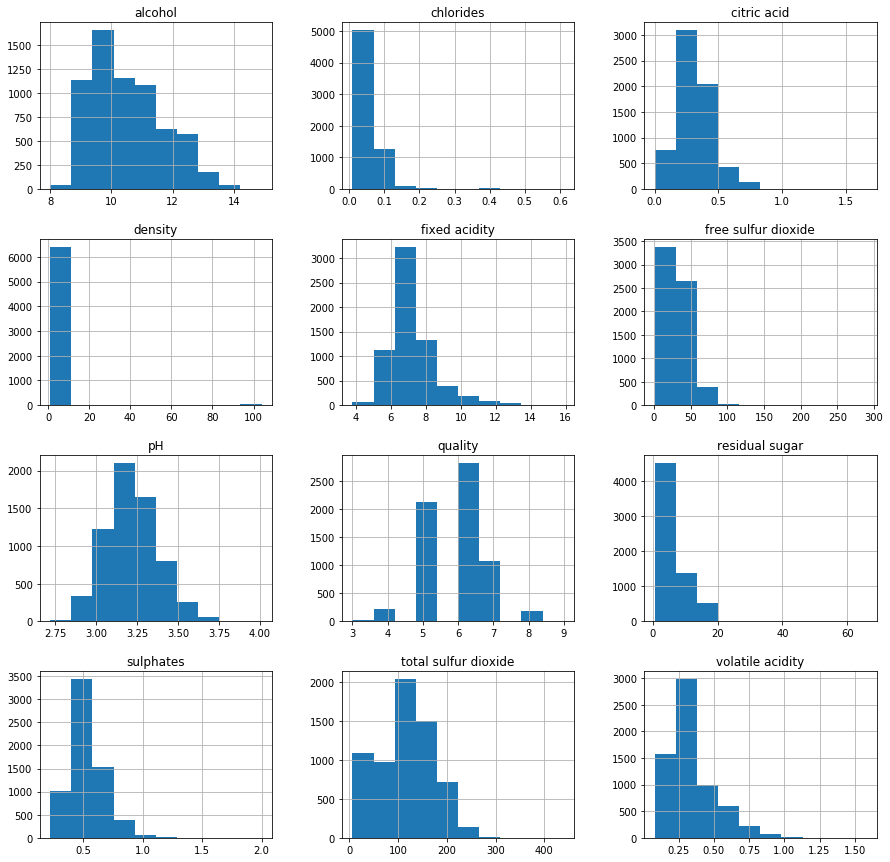

In [130]:
#plt.figure(figsize=(10,10))
dados.iloc[:,1:].hist(figsize=(15,15))
plt.show()

In [131]:
#Defining the splits for categories. 1–4 will be poor quality, 5–6 will be average, 7–10 will be great
bins = [1,4,6,10]

#0 for low quality, 1 for average, 2 for great quality
quality_labels=[0,1,2]

dados['class'] = pd.cut(dados['quality'], bins=bins, labels=quality_labels, include_lowest=True)

In [132]:
label_type = preprocessing.LabelEncoder()
dados["type"] = label_type.fit_transform(dados.type)

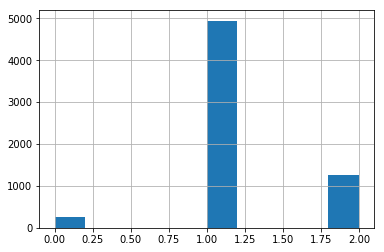

In [133]:
dados.loc[:,'class'].hist()

In [134]:
dados_clean = dados.drop(columns=['quality'])


In [12]:
#dados_clean.head()

In [135]:
x_train, x_test, y_train, y_test = train_test_split(dados_clean.iloc[:,:-1], 
                                                    dados_clean.iloc[:,-1:], 
                                                    test_size=0.30, random_state=4)

In [136]:
x_train.head()
#y_train

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
600,1,6.7,0.30,0.35,1.4,0.180,36.0,160.0,0.9937,3.11,0.54,9.4
703,1,6.4,0.33,0.28,1.1,0.038,30.0,110.0,0.9917,3.12,0.42,10.5
3840,1,6.7,0.37,0.25,2.5,0.028,24.0,84.0,0.9909,3.14,0.36,11.7
1718,1,9.3,0.20,0.33,1.7,0.050,28.0,178.0,0.9954,3.16,0.43,9.0
4991,0,7.7,0.49,0.26,1.9,0.062,9.0,31.0,0.9966,3.39,0.64,9.6


In [137]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4519 entries, 600 to 1146
Data columns (total 12 columns):
type                    4519 non-null int32
fixed acidity           4519 non-null float64
volatile acidity        4519 non-null float64
citric acid             4519 non-null float64
residual sugar          4519 non-null float64
chlorides               4519 non-null float64
free sulfur dioxide     4519 non-null float64
total sulfur dioxide    4519 non-null float64
density                 4519 non-null float64
pH                      4519 non-null float64
sulphates               4519 non-null float64
alcohol                 4519 non-null float64
dtypes: float64(11), int32(1)
memory usage: 441.3 KB



==> SVC
  Accuracy  = 0.794634 

Confusion Matrix Stats
0/0: 2.50% (2/80)
0/1: 96.25% (77/80)
0/2: 1.25% (1/80)
1/0: 0.07% (1/1478)
1/1: 96.75% (1430/1478)
1/2: 3.18% (47/1478)
2/0: 0.00% (0/380)
2/1: 71.58% (272/380)
2/2: 28.42% (108/380)


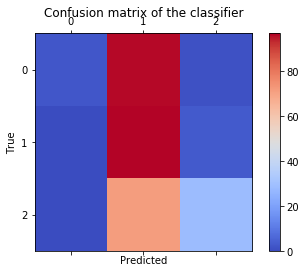


==> RandomForestClassifier
  Accuracy  = 0.825077 

Confusion Matrix Stats
0/0: 8.75% (7/80)
0/1: 90.00% (72/80)
0/2: 1.25% (1/80)
1/0: 0.41% (6/1478)
1/1: 94.72% (1400/1478)
1/2: 4.87% (72/1478)
2/0: 0.00% (0/380)
2/1: 49.47% (188/380)
2/2: 50.53% (192/380)


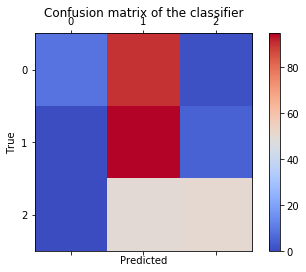


==> LogisticRegression
  Accuracy  = 0.778122 

Confusion Matrix Stats
0/0: 1.25% (1/80)
0/1: 97.50% (78/80)
0/2: 1.25% (1/80)
1/0: 0.00% (0/1478)
1/1: 97.50% (1441/1478)
1/2: 2.50% (37/1478)
2/0: 0.00% (0/380)
2/1: 82.63% (314/380)
2/2: 17.37% (66/380)


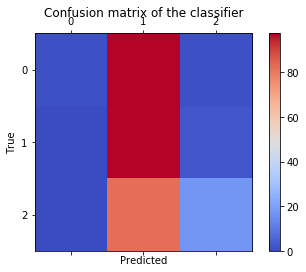


==> GaussianNB
  Accuracy  = 0.671827 

Confusion Matrix Stats
0/0: 17.50% (14/80)
0/1: 61.25% (49/80)
0/2: 21.25% (17/80)
1/0: 3.86% (57/1478)
1/1: 69.01% (1020/1478)
1/2: 27.13% (401/1478)
2/0: 0.26% (1/380)
2/1: 29.21% (111/380)
2/2: 70.53% (268/380)


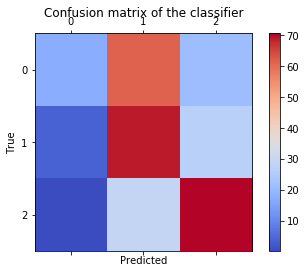


==> KNeighborsClassifier
  Accuracy  = 0.766254 

Confusion Matrix Stats
0/0: 3.75% (3/80)
0/1: 91.25% (73/80)
0/2: 5.00% (4/80)
1/0: 1.08% (16/1478)
1/1: 91.61% (1354/1478)
1/2: 7.31% (108/1478)
2/0: 0.53% (2/380)
2/1: 65.79% (250/380)
2/2: 33.68% (128/380)


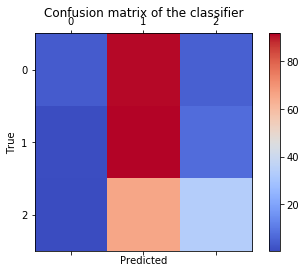


==> BaggingClassifier
  Accuracy  = 0.820949 

Confusion Matrix Stats
0/0: 11.25% (9/80)
0/1: 87.50% (70/80)
0/2: 1.25% (1/80)
1/0: 1.15% (17/1478)
1/1: 93.84% (1387/1478)
1/2: 5.01% (74/1478)
2/0: 0.00% (0/380)
2/1: 48.68% (185/380)
2/2: 51.32% (195/380)


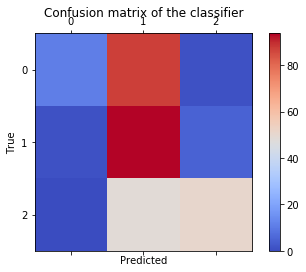


==> SVC
  Accuracy  = 0.794634 

Confusion Matrix Stats
0/0: 2.50% (2/80)
0/1: 96.25% (77/80)
0/2: 1.25% (1/80)
1/0: 0.07% (1/1478)
1/1: 96.75% (1430/1478)
1/2: 3.18% (47/1478)
2/0: 0.00% (0/380)
2/1: 71.58% (272/380)
2/2: 28.42% (108/380)


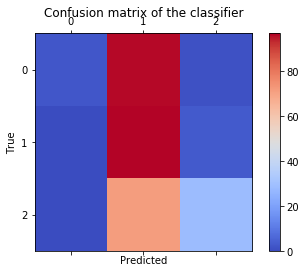


==> RandomForestClassifier
  Cols:  ['volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
  Accuracy  = 0.830237 

Confusion Matrix Stats
0/0: 11.25% (9/80)
0/1: 88.75% (71/80)
0/2: 0.00% (0/80)
1/0: 0.61% (9/1478)
1/1: 95.13% (1406/1478)
1/2: 4.26% (63/1478)
2/0: 0.00% (0/380)
2/1: 48.95% (186/380)
2/2: 51.05% (194/380)


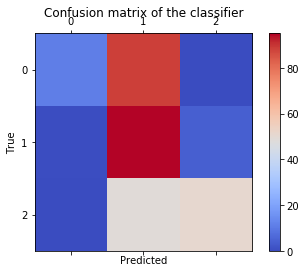


==> LogisticRegression
  Accuracy  = 0.778122 

Confusion Matrix Stats
0/0: 1.25% (1/80)
0/1: 97.50% (78/80)
0/2: 1.25% (1/80)
1/0: 0.00% (0/1478)
1/1: 97.50% (1441/1478)
1/2: 2.50% (37/1478)
2/0: 0.00% (0/380)
2/1: 82.63% (314/380)
2/2: 17.37% (66/380)


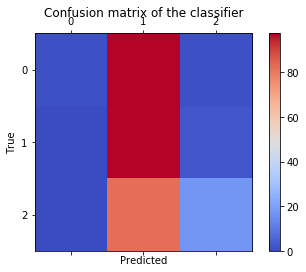


==> GaussianNB
  Accuracy  = 0.671827 

Confusion Matrix Stats
0/0: 17.50% (14/80)
0/1: 61.25% (49/80)
0/2: 21.25% (17/80)
1/0: 3.86% (57/1478)
1/1: 69.01% (1020/1478)
1/2: 27.13% (401/1478)
2/0: 0.26% (1/380)
2/1: 29.21% (111/380)
2/2: 70.53% (268/380)


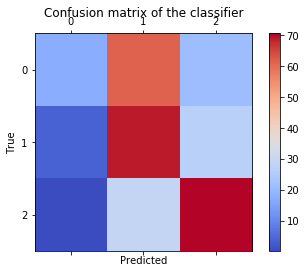


==> KNeighborsClassifier
  Accuracy  = 0.766254 

Confusion Matrix Stats
0/0: 3.75% (3/80)
0/1: 91.25% (73/80)
0/2: 5.00% (4/80)
1/0: 1.08% (16/1478)
1/1: 91.61% (1354/1478)
1/2: 7.31% (108/1478)
2/0: 0.53% (2/380)
2/1: 65.79% (250/380)
2/2: 33.68% (128/380)


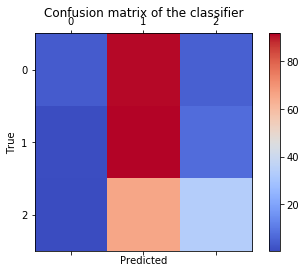


==> BaggingClassifier
  Accuracy  = 0.828173 

Confusion Matrix Stats
0/0: 16.25% (13/80)
0/1: 83.75% (67/80)
0/2: 0.00% (0/80)
1/0: 1.22% (18/1478)
1/1: 94.52% (1397/1478)
1/2: 4.26% (63/1478)
2/0: 0.00% (0/380)
2/1: 48.68% (185/380)
2/2: 51.32% (195/380)


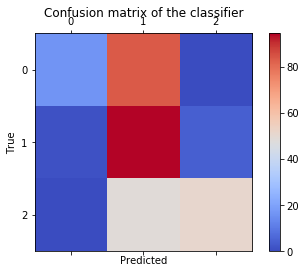

In [164]:
run_ml(x_train,x_test,y_train,y_test)


In [175]:
from imblearn.over_sampling import SMOTE, ADASYN
data_o, target_o = SMOTE().fit_sample(dados_clean.iloc[:,:-1],dados_clean.iloc[:,-1:], )

In [176]:
data_o = pd.DataFrame(data_o, columns= dados_clean.iloc[:,:-1].columns)
target_o = pd.DataFrame(target_o, columns= dados_clean.iloc[:,-1:].columns)

data_o.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [177]:
x_train, x_test, y_train, y_test = train_test_split(data_o,target_o, 
                                                    test_size=0.30, random_state=4)


==> SVC
  Accuracy  = 0.859551 

Confusion Matrix Stats
0/0: 92.70% (1359/1466)
0/1: 6.28% (92/1466)
0/2: 1.02% (15/1466)
1/0: 10.70% (163/1523)
1/1: 74.72% (1138/1523)
1/2: 14.58% (222/1523)
2/0: 1.78% (26/1461)
2/1: 7.32% (107/1461)
2/2: 90.90% (1328/1461)


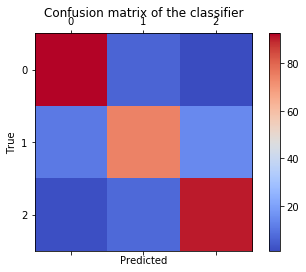


==> RandomForestClassifier
  Accuracy  = 0.888764 

Confusion Matrix Stats
0/0: 97.07% (1423/1466)
0/1: 2.59% (38/1466)
0/2: 0.34% (5/1466)
1/0: 6.70% (102/1523)
1/1: 81.09% (1235/1523)
1/2: 12.21% (186/1523)
2/0: 1.10% (16/1461)
2/1: 10.13% (148/1461)
2/2: 88.77% (1297/1461)


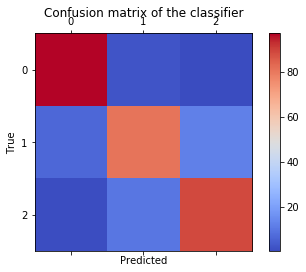


==> LogisticRegression
  Accuracy  = 0.651011 

Confusion Matrix Stats
0/0: 72.24% (1059/1466)
0/1: 17.39% (255/1466)
0/2: 10.37% (152/1466)
1/0: 26.00% (396/1523)
1/1: 43.27% (659/1523)
1/2: 30.73% (468/1523)
2/0: 5.89% (86/1461)
2/1: 13.42% (196/1461)
2/2: 80.70% (1179/1461)


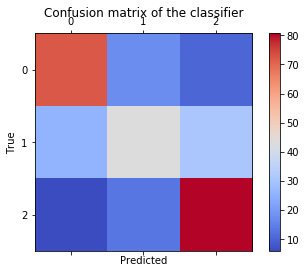


==> GaussianNB
  Accuracy  = 0.526517 

Confusion Matrix Stats
0/0: 54.64% (801/1466)
0/1: 10.16% (149/1466)
0/2: 35.20% (516/1466)
1/0: 29.15% (444/1523)
1/1: 21.60% (329/1523)
1/2: 49.24% (750/1523)
2/0: 4.24% (62/1461)
2/1: 12.73% (186/1461)
2/2: 83.03% (1213/1461)


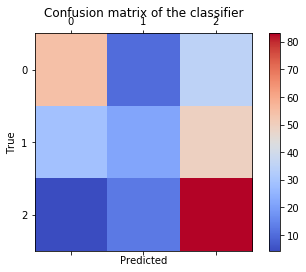


==> KNeighborsClassifier
  Accuracy  = 0.802697 

Confusion Matrix Stats
0/0: 94.54% (1386/1466)
0/1: 4.16% (61/1466)
0/2: 1.30% (19/1466)
1/0: 18.78% (286/1523)
1/1: 56.47% (860/1523)
1/2: 24.75% (377/1523)
2/0: 2.87% (42/1461)
2/1: 6.37% (93/1461)
2/2: 90.76% (1326/1461)


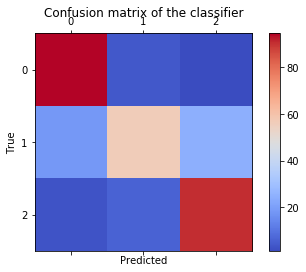


==> BaggingClassifier
  Accuracy  = 0.885169 

Confusion Matrix Stats
0/0: 96.73% (1418/1466)
0/1: 3.14% (46/1466)
0/2: 0.14% (2/1466)
1/0: 6.83% (104/1523)
1/1: 80.83% (1231/1523)
1/2: 12.34% (188/1523)
2/0: 1.10% (16/1461)
2/1: 10.61% (155/1461)
2/2: 88.30% (1290/1461)


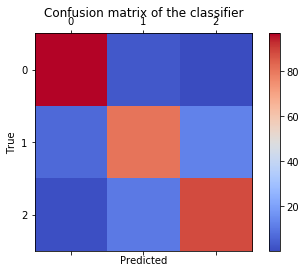


==> SVC
  Accuracy  = 0.859551 

Confusion Matrix Stats
0/0: 92.70% (1359/1466)
0/1: 6.28% (92/1466)
0/2: 1.02% (15/1466)
1/0: 10.70% (163/1523)
1/1: 74.72% (1138/1523)
1/2: 14.58% (222/1523)
2/0: 1.78% (26/1461)
2/1: 7.32% (107/1461)
2/2: 90.90% (1328/1461)


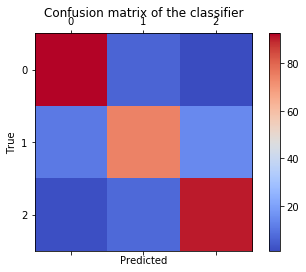


==> RandomForestClassifier
  Cols:  ['volatile acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol']
  Accuracy  = 0.871461 

Confusion Matrix Stats
0/0: 95.36% (1398/1466)
0/1: 3.75% (55/1466)
0/2: 0.89% (13/1466)
1/0: 8.80% (134/1523)
1/1: 78.59% (1197/1523)
1/2: 12.61% (192/1523)
2/0: 0.82% (12/1461)
2/1: 11.36% (166/1461)
2/2: 87.82% (1283/1461)


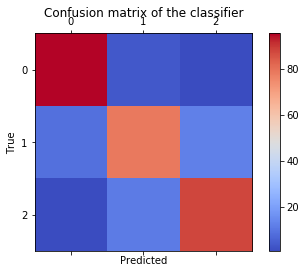


==> LogisticRegression
  Accuracy  = 0.651011 

Confusion Matrix Stats
0/0: 72.24% (1059/1466)
0/1: 17.39% (255/1466)
0/2: 10.37% (152/1466)
1/0: 26.00% (396/1523)
1/1: 43.27% (659/1523)
1/2: 30.73% (468/1523)
2/0: 5.89% (86/1461)
2/1: 13.42% (196/1461)
2/2: 80.70% (1179/1461)


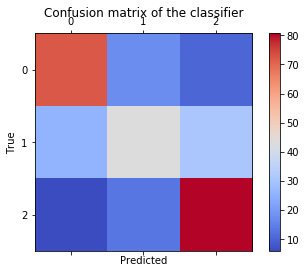


==> GaussianNB
  Accuracy  = 0.526517 

Confusion Matrix Stats
0/0: 54.64% (801/1466)
0/1: 10.16% (149/1466)
0/2: 35.20% (516/1466)
1/0: 29.15% (444/1523)
1/1: 21.60% (329/1523)
1/2: 49.24% (750/1523)
2/0: 4.24% (62/1461)
2/1: 12.73% (186/1461)
2/2: 83.03% (1213/1461)


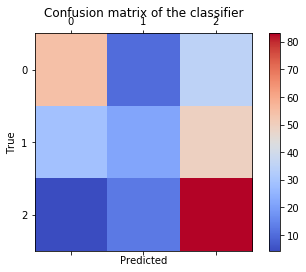


==> KNeighborsClassifier
  Accuracy  = 0.802697 

Confusion Matrix Stats
0/0: 94.54% (1386/1466)
0/1: 4.16% (61/1466)
0/2: 1.30% (19/1466)
1/0: 18.78% (286/1523)
1/1: 56.47% (860/1523)
1/2: 24.75% (377/1523)
2/0: 2.87% (42/1461)
2/1: 6.37% (93/1461)
2/2: 90.76% (1326/1461)


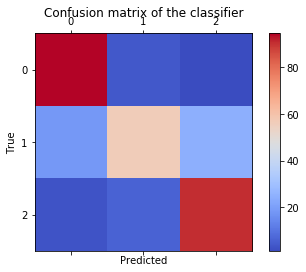


==> BaggingClassifier
  Accuracy  = 0.886067 

Confusion Matrix Stats
0/0: 96.45% (1414/1466)
0/1: 3.00% (44/1466)
0/2: 0.55% (8/1466)
1/0: 6.30% (96/1523)
1/1: 81.29% (1238/1523)
1/2: 12.41% (189/1523)
2/0: 0.89% (13/1461)
2/1: 10.75% (157/1461)
2/2: 88.36% (1291/1461)


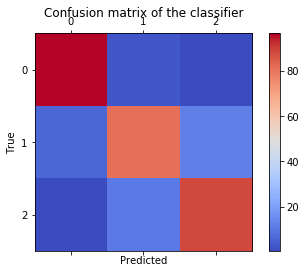

In [178]:
run_ml(x_train,x_test,y_train,y_test)
